In [ ]:
print("Hello world")

Hello world


In [ ]:
### import all libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
calendar = pd.read_csv(r'C:\Users\shiva\OneDrive\Documents\Demand Forecasting of Walmart\notebook\calendar.csv', encoding='latin')

In [ ]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
sales_train = pd.read_csv(r'C:\Users\shiva\OneDrive\Documents\Demand Forecasting of Walmart\notebook\sales_train_validation.csv', encoding='latin')

In [ ]:
sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
prices = pd.read_csv(r'C:\Users\shiva\OneDrive\Documents\Demand Forecasting of Walmart\notebook\sell_prices.csv', encoding='latin')

In [ ]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
### dropping wm_yr_wk from dataframes

In [ ]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
'''
1) Perform data cleaning removing null, duplicate values, negative values and price with 0 values
2) Perform EDA on the datasets
3) Choose the model to train whether the dataset is based on trend or seasonality or both
4) Train the model with sales_data_validation
5) Check the train accuracy of the model and check whether it's not overfitting
6) Validate the model with sales_data_evaluation
7) Check the accuracy of the model
'''

"\n1) Perform data cleaning removing null, duplicate values, negative values and price with 0 values\n2) Perform EDA on the datasets\n3) Choose the model to train whether the dataset is based on trend or seasonality or both\n4) Train the model with sales_data_validation\n5) Check the train accuracy of the model and check whether it's not overfitting\n6) Validate the model with sales_data_evaluation\n7) Check the accuracy of the model\n"

In [ ]:
### data cleaning

In [ ]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
calendar.duplicated().sum()

np.int64(0)

In [ ]:
calendar.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [ ]:
calendar['event_name_1'].nunique()

30

In [ ]:
calendar['event_name_1'].mode()

0          LentStart
1          LentWeek2
2        MemorialDay
3       Mother's day
4       NBAFinalsEnd
5     NBAFinalsStart
6         Pesach End
7      PresidentsDay
8          Purim End
9     Ramadan starts
10     StPatricksDay
11         SuperBowl
12     ValentinesDay
Name: event_name_1, dtype: str

In [ ]:
calendar['event_name_1'] = calendar['event_name_1'].fillna('No_event')
calendar['event_type_1'] = calendar['event_type_1'].fillna("No_event")
calendar['event_name_2'] = calendar['event_name_2'].fillna("No_event")
calendar['event_type_2'] = calendar['event_type_2'].fillna("No_event")

In [ ]:
calendar[calendar['event_type_1'] == 'No_event']

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,No_event,No_event,No_event,No_event,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,No_event,No_event,No_event,No_event,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,No_event,No_event,No_event,No_event,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,No_event,No_event,No_event,No_event,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,No_event,No_event,No_event,No_event,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,2016-06-14,11620,Tuesday,4,6,2016,d_1964,No_event,No_event,No_event,No_event,0,0,1
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,No_event,No_event,No_event,No_event,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,No_event,No_event,No_event,No_event,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,No_event,No_event,No_event,No_event,0,0,0


In [ ]:
calendar.isnull().sum()

date            0
wm_yr_wk        0
weekday         0
wday            0
month           0
year            0
d               0
event_name_1    0
event_type_1    0
event_name_2    0
event_type_2    0
snap_CA         0
snap_TX         0
snap_WI         0
dtype: int64

In [ ]:
sales_train.duplicated().sum()

np.int64(0)

In [ ]:
sales_train.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64

In [ ]:
prices.duplicated().sum()

np.int64(0)

In [ ]:
prices.head(1000)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
995,CA_1,HOBBIES_1_005,11437,2.88
996,CA_1,HOBBIES_1_005,11438,2.88
997,CA_1,HOBBIES_1_005,11439,2.88
998,CA_1,HOBBIES_1_005,11440,2.88


In [ ]:
sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
sales_train.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64

In [ ]:
prices.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [ ]:
calendar.isnull().sum()

date            0
wm_yr_wk        0
weekday         0
wday            0
month           0
year            0
d               0
event_name_1    0
event_type_1    0
event_name_2    0
event_type_2    0
snap_CA         0
snap_TX         0
snap_WI         0
dtype: int64

In [ ]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
prices[prices['sell_price'] == 0]

,store_id,item_id,wm_yr_wk,sell_price


In [ ]:
prices[prices['item_id'] == '']

,store_id,item_id,wm_yr_wk,sell_price


In [ ]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,No_event,No_event,No_event,No_event,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,No_event,No_event,No_event,No_event,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,No_event,No_event,No_event,No_event,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,No_event,No_event,No_event,No_event,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,No_event,No_event,No_event,No_event,1,0,1


In [ ]:
calendar.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [ ]:
calendar[calendar['wday'] == 0]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI


In [ ]:
sales_train.shape

(30490, 1919)

In [ ]:
sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [ ]:
sales_train = sales_train.melt(
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
    var_name='d',
    value_name='TotalSales'
)

In [ ]:
sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,TotalSales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [ ]:
calendar.shape

(1969, 14)

In [ ]:
sales_train = sales_train.merge(calendar, on='d')

In [ ]:
sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,TotalSales,date,wm_yr_wk,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,No_event,No_event,No_event,No_event,0,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,No_event,No_event,No_event,No_event,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,No_event,No_event,No_event,No_event,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,No_event,No_event,No_event,No_event,0,0,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,No_event,No_event,No_event,No_event,0,0,0


In [ ]:
sales_train = sales_train.drop("d", axis=1)

In [ ]:
sales_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,TotalSales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,No_event,No_event,No_event,No_event,0,0,0
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,No_event,No_event,No_event,No_event,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,No_event,No_event,No_event,No_event,0,0,0
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,No_event,No_event,No_event,No_event,0,0,0
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,11101,Saturday,1,1,2011,No_event,No_event,No_event,No_event,0,0,0


In [ ]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
sales_train.isnull().sum()

id              0
item_id         0
dept_id         0
cat_id          0
store_id        0
state_id        0
TotalSales      0
date            0
wm_yr_wk        0
weekday         0
wday            0
month           0
year            0
event_name_1    0
event_type_1    0
event_name_2    0
event_type_2    0
snap_CA         0
snap_TX         0
snap_WI         0
dtype: int64

In [ ]:
sales_train.shape

(58327370, 20)

In [ ]:
prices.groupby("item_id")['sell_price'].max()

item_id
FOODS_1_001         2.24
FOODS_1_002         9.48
FOODS_1_003         3.23
FOODS_1_004         1.96
FOODS_1_005         3.54
                   ...  
HOUSEHOLD_2_512     4.27
HOUSEHOLD_2_513     2.78
HOUSEHOLD_2_514    20.97
HOUSEHOLD_2_515     1.97
HOUSEHOLD_2_516     5.94
Name: sell_price, Length: 3049, dtype: float64

In [ ]:
### creating the final dataset

In [ ]:
final_df = sales_train.groupby("date")['TotalSales'].sum().reset_index()

In [ ]:
final_df.head()

,date,TotalSales
0,2011-01-29,32631
1,2011-01-30,31749
2,2011-01-31,23783
3,2011-02-01,25412
4,2011-02-02,19146


In [ ]:
final_df.isnull().sum()

date          0
TotalSales    0
dtype: int64

In [ ]:
final_df.duplicated().sum()

np.int64(0)

Text(0, 0.5, 'TotalSales')

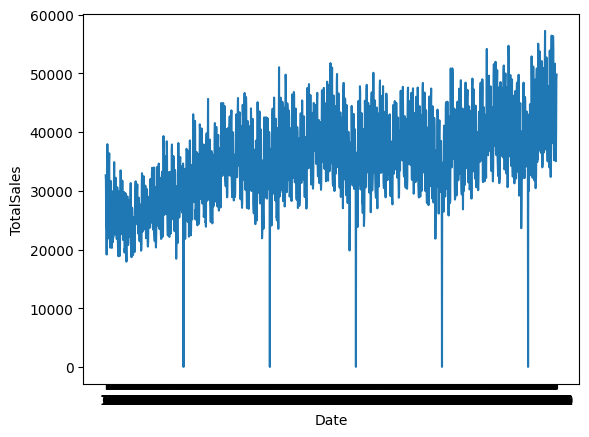

In [ ]:
plt.plot(final_df.index, final_df['TotalSales'])
plt.xticks(final_df.index)
plt.xlabel("Date")
plt.ylabel("TotalSales")

In [ ]:
### importing SARIMA model from statsmodels

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
final_df = final_df.sort_values("date")

In [ ]:
final_df.head()

,date,TotalSales
0,2011-01-29,32631
1,2011-01-30,31749
2,2011-01-31,23783
3,2011-02-01,25412
4,2011-02-02,19146


In [ ]:
final_df.set_index("date", inplace=True)

In [ ]:
final_df

,TotalSales
date,
2011-01-29,32631
2011-01-30,31749
2011-01-31,23783
2011-02-01,25412
2011-02-02,19146
...,...
2016-04-20,35343
2016-04-21,35033
2016-04-22,40517


In [ ]:
final_df['TotalSales'] = np.log1p(final_df['TotalSales'])

In [ ]:
### Total Sales graph

In [ ]:
final_df.index = pd.to_datetime(final_df.index)

In [ ]:
### avg sales

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(final_df['TotalSales'])

In [ ]:
result

(np.float64(-4.247046643623228),
 np.float64(0.0005479580648495739),
 26,
 1886,
 {'1%': np.float64(-3.433822016251123),
  '5%': np.float64(-2.8630736989499335),
  '10%': np.float64(-2.567586484303047)},
 np.float64(2097.6832864799762))

In [ ]:
final_df['diff_sales'] = final_df['TotalSales'].diff()

In [ ]:
final_df.head()

,TotalSales,diff_sales
date,,
2011-01-29,10.393049,NaN
2011-01-30,10.365648,-0.027401
2011-01-31,10.076768,-0.288880
2011-02-01,10.143016,0.066248
2011-02-02,9.859901,-0.283115


In [ ]:
final_df.isnull().sum()

TotalSales    0
diff_sales    1
dtype: int64

In [ ]:
final_df = final_df.dropna()

In [ ]:
final_df.head()

,TotalSales,diff_sales
date,,
2011-01-30,10.365648,-0.027401
2011-01-31,10.076768,-0.288880
2011-02-01,10.143016,0.066248
2011-02-02,9.859901,-0.283115
2011-02-03,10.282335,0.422434


In [ ]:
result = adfuller(final_df['diff_sales'])

In [ ]:
result

(np.float64(-16.932382203227753),
 np.float64(9.754977103761293e-30),
 26,
 1885,
 {'1%': np.float64(-3.4338238606869878),
  '5%': np.float64(-2.863074513221476),
  '10%': np.float64(-2.5675869178703854)},
 np.float64(2085.587710475721))

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1200x500 with 0 Axes>

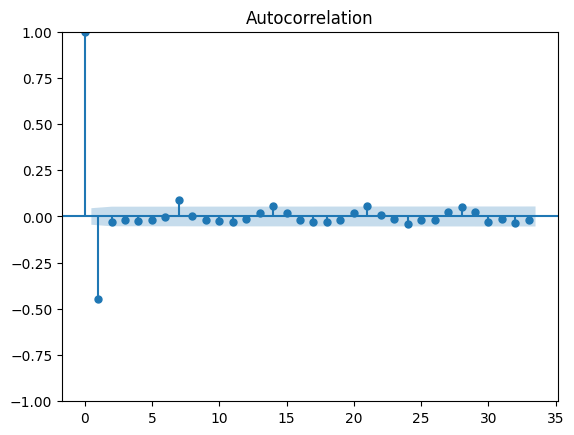

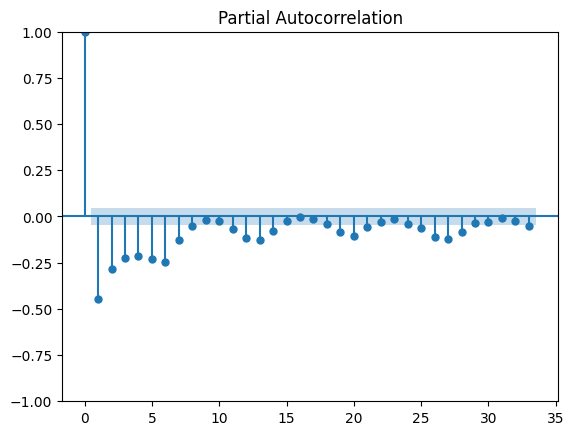

In [ ]:
plt.figure(figsize=(12, 5))
plot_acf(final_df['diff_sales'])
plot_pacf(final_df['diff_sales'])
plt.show()

In [ ]:
train = final_df[:-30]
test = final_df[-30:]

In [ ]:
model = SARIMAX(
    train['TotalSales'],
    order=(1,1,1),
    seasonal_order=(1,2,2,7)
)

c:\Users\shiva\OneDrive\Documents\Demand Forecasting of Walmart\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\shiva\OneDrive\Documents\Demand Forecasting of Walmart\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
result = model.fit()

c:\Users\shiva\OneDrive\Documents\Demand Forecasting of Walmart\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\Users\shiva\OneDrive\Documents\Demand Forecasting of Walmart\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
final_df

,TotalSales,diff_sales
date,,
2011-01-30,10.365648,-0.027401
2011-01-31,10.076768,-0.288880
2011-02-01,10.143016,0.066248
2011-02-02,9.859901,-0.283115
2011-02-03,10.282335,0.422434
...,...,...
2016-04-20,10.472884,-0.061104
2016-04-21,10.464074,-0.008810
2016-04-22,10.609502,0.145427


In [ ]:
final_df.head()

,TotalSales,diff_sales
date,,
2011-01-30,10.365648,-0.027401
2011-01-31,10.076768,-0.288880
2011-02-01,10.143016,0.066248
2011-02-02,9.859901,-0.283115
2011-02-03,10.282335,0.422434


In [ ]:
final_df.index

Index(['2011-01-30', '2011-01-31', '2011-02-01', '2011-02-02', '2011-02-03',
       '2011-02-04', '2011-02-05', '2011-02-06', '2011-02-07', '2011-02-08',
       ...
       '2016-04-15', '2016-04-16', '2016-04-17', '2016-04-18', '2016-04-19',
       '2016-04-20', '2016-04-21', '2016-04-22', '2016-04-23', '2016-04-24'],
      dtype='str', name='date', length=1912)

In [ ]:
forecast

2016-03-26    10.579556
2016-03-27    10.566843
2016-03-28    10.565753
2016-03-29    10.565660
2016-03-30    10.565652
2016-03-31    10.565651
2016-04-01    10.565651
2016-04-02    10.565651
2016-04-03    10.565651
2016-04-04    10.565651
2016-04-05    10.565651
2016-04-06    10.565651
2016-04-07    10.565651
2016-04-08    10.565651
2016-04-09    10.565651
2016-04-10    10.565651
2016-04-11    10.565651
2016-04-12    10.565651
2016-04-13    10.565651
2016-04-14    10.565651
2016-04-15    10.565651
2016-04-16    10.565651
2016-04-17    10.565651
2016-04-18    10.565651
2016-04-19    10.565651
2016-04-20    10.565651
2016-04-21    10.565651
2016-04-22    10.565651
2016-04-23    10.565651
2016-04-24    10.565651
Freq: D, Name: predicted_mean, dtype: float64

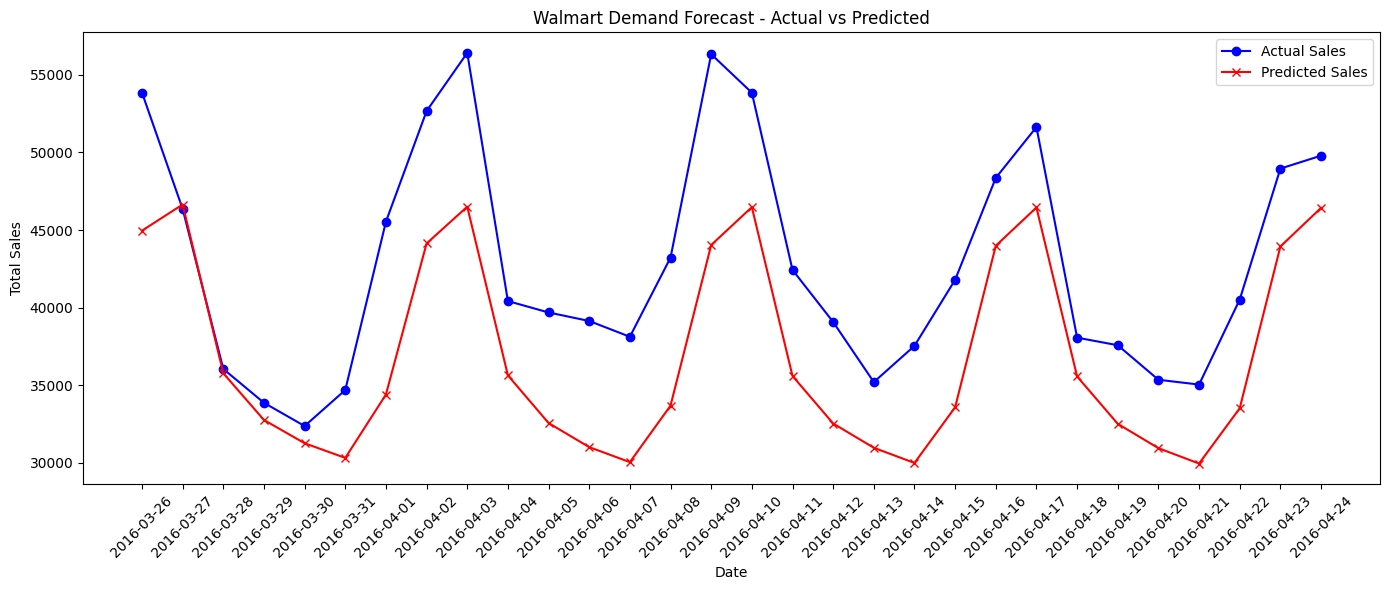

In [ ]:
# Get predictions for the test period
forecast = result.forecast(steps=30)

# Reverse log1p transform to get actual sales scale
forecast_actual = np.expm1(forecast)
test_actual = np.expm1(test['TotalSales'])

# Plot
plt.figure(figsize=(14, 6))
plt.plot(test.index, test_actual, label='Actual Sales', color='blue', marker='o')
plt.plot(test.index, forecast_actual, label='Predicted Sales', color='red', marker='x')
plt.title('Walmart Demand Forecast - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
forecast

2016-03-26    10.579556
2016-03-27    10.566843
2016-03-28    10.565753
2016-03-29    10.565660
2016-03-30    10.565652
2016-03-31    10.565651
2016-04-01    10.565651
2016-04-02    10.565651
2016-04-03    10.565651
2016-04-04    10.565651
2016-04-05    10.565651
2016-04-06    10.565651
2016-04-07    10.565651
2016-04-08    10.565651
2016-04-09    10.565651
2016-04-10    10.565651
2016-04-11    10.565651
2016-04-12    10.565651
2016-04-13    10.565651
2016-04-14    10.565651
2016-04-15    10.565651
2016-04-16    10.565651
2016-04-17    10.565651
2016-04-18    10.565651
2016-04-19    10.565651
2016-04-20    10.565651
2016-04-21    10.565651
2016-04-22    10.565651
2016-04-23    10.565651
2016-04-24    10.565651
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(
    train['TotalSales'],
    order=(1,1,1),
)

c:\Users\shiva\OneDrive\Documents\Demand Forecasting of Walmart\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\shiva\OneDrive\Documents\Demand Forecasting of Walmart\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\shiva\OneDrive\Documents\Demand Forecasting of Walmart\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
result = model.fit()

In [ ]:
forecast = result.forecast(steps=30)

In [ ]:
forecast

2016-03-26    10.579556
2016-03-27    10.566843
2016-03-28    10.565753
2016-03-29    10.565660
2016-03-30    10.565652
2016-03-31    10.565651
2016-04-01    10.565651
2016-04-02    10.565651
2016-04-03    10.565651
2016-04-04    10.565651
2016-04-05    10.565651
2016-04-06    10.565651
2016-04-07    10.565651
2016-04-08    10.565651
2016-04-09    10.565651
2016-04-10    10.565651
2016-04-11    10.565651
2016-04-12    10.565651
2016-04-13    10.565651
2016-04-14    10.565651
2016-04-15    10.565651
2016-04-16    10.565651
2016-04-17    10.565651
2016-04-18    10.565651
2016-04-19    10.565651
2016-04-20    10.565651
2016-04-21    10.565651
2016-04-22    10.565651
2016-04-23    10.565651
2016-04-24    10.565651
Freq: D, Name: predicted_mean, dtype: float64

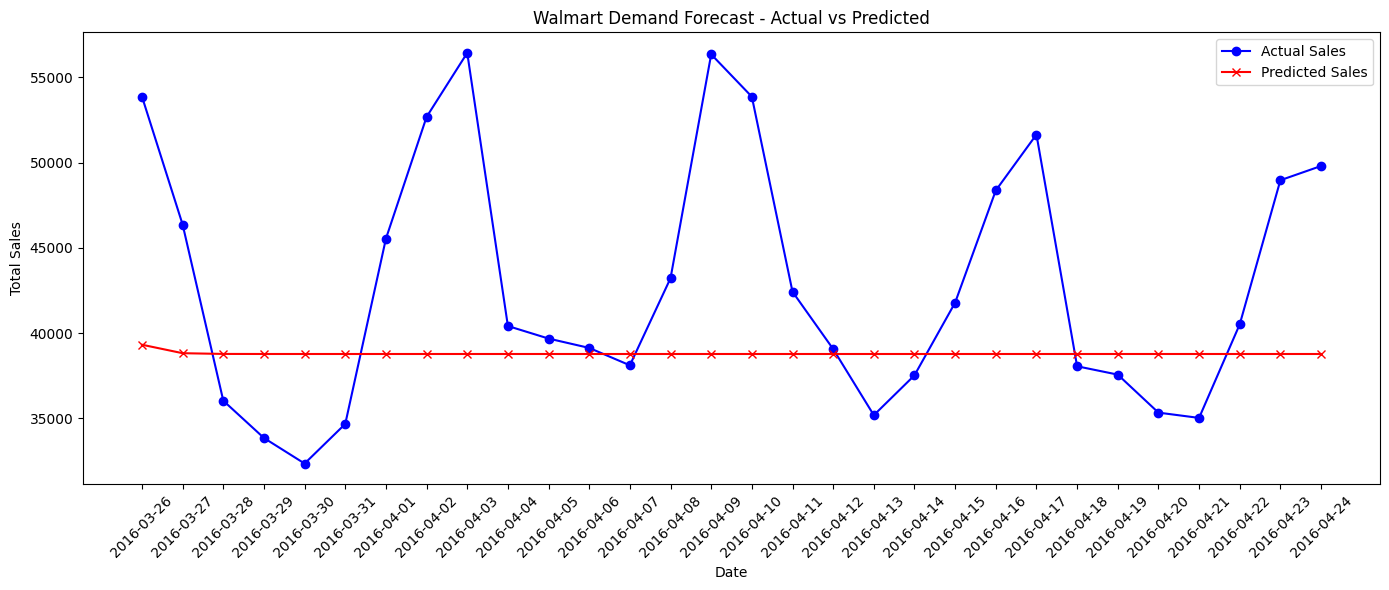

In [ ]:
# Get predictions for the test period
forecast = result.forecast(steps=30)

# Reverse log1p transform to get actual sales scale
forecast_actual = np.expm1(forecast)
test_actual = np.expm1(test['TotalSales'])

# Plot
plt.figure(figsize=(14, 6))
plt.plot(test.index, test_actual, label='Actual Sales', color='blue', marker='o')
plt.plot(test.index, forecast_actual, label='Predicted Sales', color='red', marker='x')
plt.title('Walmart Demand Forecast - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
forecast_actual

2016-03-26    39321.633765
2016-03-27    38824.891787
2016-03-28    38782.622102
2016-03-29    38779.002420
2016-03-30    38778.692288
2016-03-31    38778.665715
2016-04-01    38778.663438
2016-04-02    38778.663243
2016-04-03    38778.663226
2016-04-04    38778.663225
2016-04-05    38778.663225
2016-04-06    38778.663225
2016-04-07    38778.663225
2016-04-08    38778.663225
2016-04-09    38778.663225
2016-04-10    38778.663225
2016-04-11    38778.663225
2016-04-12    38778.663225
2016-04-13    38778.663225
2016-04-14    38778.663225
2016-04-15    38778.663225
2016-04-16    38778.663225
2016-04-17    38778.663225
2016-04-18    38778.663225
2016-04-19    38778.663225
2016-04-20    38778.663225
2016-04-21    38778.663225
2016-04-22    38778.663225
2016-04-23    38778.663225
2016-04-24    38778.663225
Freq: D, Name: predicted_mean, dtype: float64